In [3]:
###--------------------Clustering Project------------------###
# Aim - Cluster the different customers based on their purchase and provide recommnadation based on it, to improve the business.
# Algorithm - K-Means
# Dataset- Kaggel - Mall_Customers.csv
#-----------------------------------
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# Data Collection and analysis
customer_data = pd.read_csv("Mall_Customers.csv")
# first five rows in the data frame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape # total rows and column
customer_data.info() # insight info about data
customer_data.isnull().sum() # checking null and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# choosing two columns like annual income and spending score 
x = customer_data.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [6]:
# Choose number of clusters
# Method used - Within Clusters Sum of Square  (WCSS)

WCSS = [] # create an empty list
for i in range (1,11): # checking wcss value for total 10 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

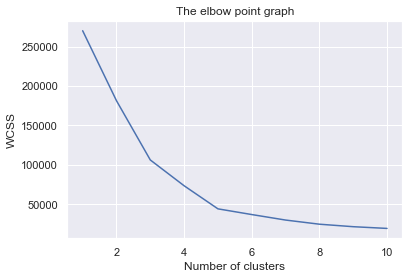

In [7]:
# Plot an elbow graph
sns.set()
plt.plot(range(1,11), WCSS)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [8]:
# here in the elbow graph we can see....we have two elbow points which shows the sharp changes...
# when number of clusters = 5. After that we could not able to find any significant change...
# OPTIMUM CLUSTERS = 5.
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 0)
y = kmeans.fit_predict(x) # it will return cluster number for each cluster data
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


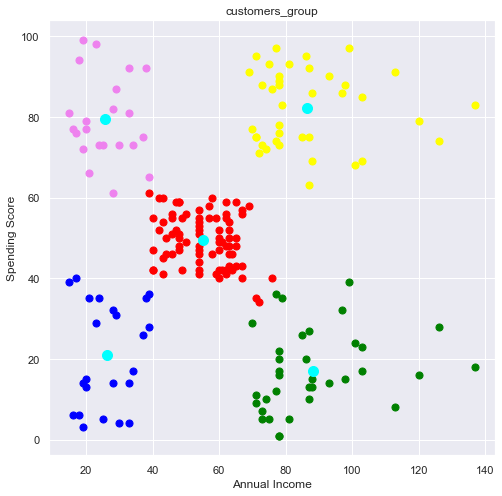

In [9]:
# plot the figure
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green',label = 'cluster1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red',label = 'cluster2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow',label = 'cluster3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet',label = 'cluster4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue',label = 'cluster5')

# plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label ='Centroids')
plt.title('customers_group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [13]:
# Conclusion
# based on the above graph we found that, there are some customers whose annual income is low and spending score is also low but it is
# not true for all of them.
# There are some customers whose annual income is high and spending score is also high but it is not true for all of them.

In [16]:
#######---------------Recommand offer to different customers based on their clusters
def recommndation():
    Cluster = int(input("enter the cluster number ="))
    if Cluster == 1:
        print("Give them a good cash back offer upto 40%")
    elif Cluster == 2:
        print("Give them a good cash back offer upto 10%")
    elif Cluster == 3:
        print("Give them a good cash back offer upto 10%")
    elif Cluster == 4:
        print("Give them a good cash back offer upto 20%")
    elif Cluster == 5:
        print("Give them a good cash back offer upto 55%")

In [17]:
#####--------------------------Demo based on input taken from user----------
recommndation()

enter the cluster number =1
Give them a good cash back offer upto 40%


In [18]:
recommndation()

enter the cluster number =2
Give them a good cash back offer upto 10%


In [19]:
recommndation()

enter the cluster number =3
Give them a good cash back offer upto 10%


In [20]:
recommndation()

enter the cluster number =4
Give them a good cash back offer upto 20%


In [21]:
recommndation()

enter the cluster number =5
Give them a good cash back offer upto 55%


In [ ]:
##############----------------End Of the Project--------------------------------################################